<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_04_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 04 – Entrega 20/09/2023
###Prof. Pedro Constantino


---


**Problema 1**

---

=========INICIANDO CALCULOS=========
k	 x	 abs(f)
0	 1.1000	 1.7100e+00
1	 2.8100	 1.5390e-01
2	 2.6561	 2.2563e-01
3	 2.4305	 2.4517e-01
4	 2.1853	 1.5097e-01
5	 2.0343	 3.3158e-02
6	 2.0012	 1.1776e-03
7	 2.0000	 1.3901e-06
8	 2.0000	 1.9327e-12


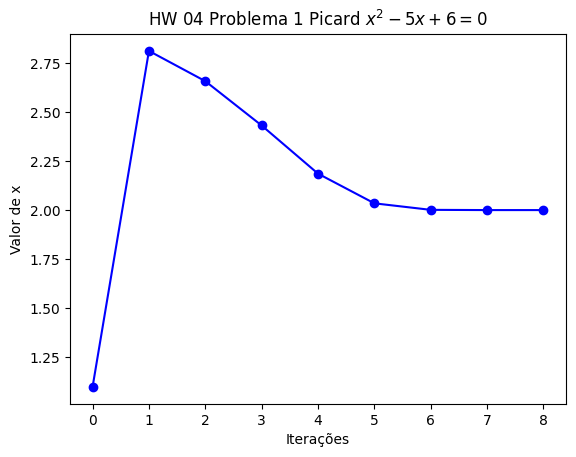

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de interesse f(x) = (x-2)(x-3) = 0
def residual(x):
    return x**2 - 5*x + 6

x = 1.1         # Testar diferentes valores de chute inicial!
R = residual(x)
error = abs(R)
count = 0

iter = [count]
xout = [x]

print("=========INICIANDO CALCULOS=========")
print("k\t x\t abs(f)")
print("%d\t %.4f\t %.4e" % (count, x, error))

while error > 1e-8:
    count += 1
    x = x + residual(x)
    R = residual(x)
    error = abs(R)

    print("%d\t %.4f\t %.4e" % (count, x, error))

    if count > 10000:
        print("Não convergiu!")
        error = 0
    xout.append(x)
    iter.append(count)

plt.plot(iter, xout, '-ob')
plt.xlabel('Iterações')
plt.ylabel('Valor de x')
plt.title('HW 04 Problema 1 Picard $x^2 - 5x + 6=0$')
plt.show()



---


**Problema 2A**

---

Iniciando o Método de Newton
k	 phi 		 f
 0	 0.100000	 -6.3458e+05
 1	 0.132120	 -2.6510e+05
 2	 0.173974	 -1.1031e+05
 3	 0.228001	 -4.5618e+04
 4	 0.296731	 -1.8678e+04
 5	 0.382114	 -7.5160e+03
 6	 0.483867	 -2.9260e+03
 7	 0.595997	 -1.0631e+03
 8	 0.701500	 -3.2950e+02
 9	 0.772616	 -6.8457e+01
10	 0.796499	 -5.0679e+00
11	 0.798564	 -3.3613e-02
12	 0.798578	 -1.5037e-06
13	 0.798578	 -5.6843e-14
O valor convergido é phi = 0.798578


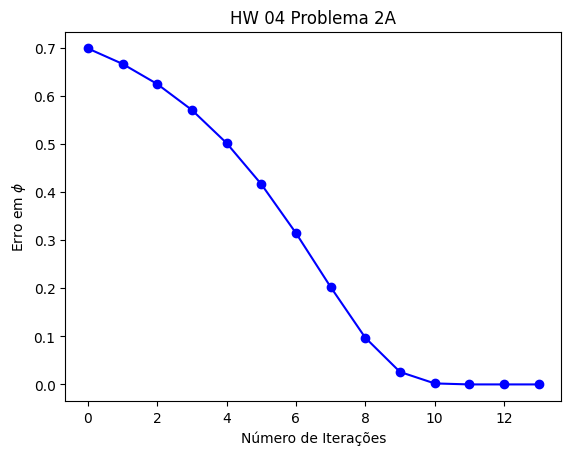

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,a,b,c):
    return a - b * (1 - x)**2 / x**3 - c * (1 - x) / x**3

def derivfunc(x, b, c):
    term1 = (-2 * x**3 * (1 - x) - 3 * (1 - x)**2 * x**2) / x**6
    term2 = (-x**3 - 3 * x**2 * (1 - x)) / x**6
    return -b*term1 - c*term2

def newton_raphson(x0, a, b, c, tol):
    x = x0
    f = func(x, a, b, c)
    count = 0

    iter = [count]
    xout = [x0]

    print("Iniciando o Método de Newton")
    print("=====================================")
    print("k\t phi \t\t f")


    while abs(f) > tol:
        print("%2d\t %.6f\t %.4e" % (count, x, f))
        df = derivfunc(x, b, c)
        x = x - f / df
        count += 1

        if count > 200:
            print('Não convergiu!')
            x = -1  # dummy value
            break

        f = func(x, a, b, c)
        xout.append(x)
        iter.append(count)

    print("%2d\t %.6f\t %.4e" % (count, x, f))
    print("=====================================")
    print("O valor convergido é phi = %.6f" % x)
    print("=====================================")
    xout = np.array(xout)
    iter = np.array(iter)
    return xout, iter

# Dados do Problema
eta = 1.0   # Viscosidade do fluido(cP)
vo = 0.1    # Velocidade superficial (m/s)
Dp = 5.0    # Diâmetro das partículas (cm)
rho = 2.0   # Densidade do fluido (g/cm³)
dP = 416.0  # Queda de pressão (Pa)
L = 1.5     # Comprimento do reator (m)

# Converter para unidades SI
eta = eta*1e-3  # Pa-s
rho = rho*1000  # kg/m³
Dp = Dp / 100   # m

# Calcular as variáveis concentradas a, b, and c
a = dP / L
b = 150 * eta * vo / Dp**2
c = (7/4) * rho * vo**2 / Dp

# Usar Newton-Raphson para calcular phi
phi0 = 0.1       # Chute inicial para 'phi' entre 0 e 1
tol = 10e-14     # Tolerância para convergência

phi, iter = newton_raphson(phi0, a, b, c, tol)

# Para calcular o erro, vamos considerar o último valor de phi como sendo a solução correta
phi_sol = phi[-1]
errors = np.abs(phi - phi_sol)

# Plotar gráfico do erro vs. número de iterações
plt.plot(iter, errors, '-ob')
plt.title('HW 04 Problema 2A')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro em $\phi$')
plt.show()



---


**Problema 2B**

---

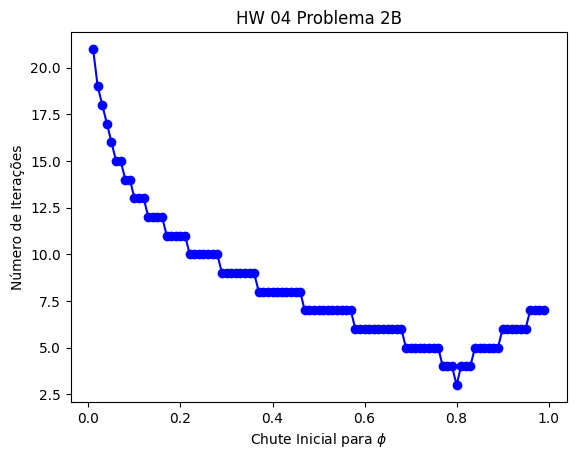

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função f(x)
def func(x, a, b, c):
    return a - b * (1 - x)**2 / x**3 - c * (1 - x) / x**3

# Definir a derivada da função f'(x)
def derivfunc(x, b, c):
    term1 = (-2 * x**3 * (1 - x) - 3 * (1 - x)**2 * x**2) / x**6
    term2 = (-x**3 - 3 * x**2 * (1 - x)) / x**6
    return -b*term1 - c*term2

# Definir as iterações de Newton
def newton(x0, a, b, c, tol):
    x = x0
    count = 0

    # Avaliar a função no chute inicial
    f = func(x, a, b, c)

    while abs(f) > tol:
        df = derivfunc(x, b, c)  # Avaliar a derivada no chute
        x = x - f / df           # Definir novo chute
        count += 1

        if count > 200:
            print('Não convergiu!')
            break

        f = func(x, a, b, c)    # Avaliar a função no novo chute

    return x, count

# Dados do Problema
eta = 1.0   # Viscosidade do fluido(cP)
vo = 0.1    # Velocidade superficial (m/s)
Dp = 5.0    # Diâmetro das partículas (cm)
rho = 2.0   # Densidade do fluido (kg/m³)
dP = 416.0  # Queda de pressão (Pa)
L = 1.5     # Comprimento do reator (m)

# Converter para unidades SI
eta = eta*1e-3  # Pa-s
rho = rho*1000  # kg/m³
Dp = Dp / 100   # m

# Calcular as variáveis concentradas a, b, and c
a = dP / L
b = 150 * eta * vo / Dp**2
c = (7/4) * rho * vo**2 / Dp


# Usar Newton-Raphson para calcular phi
tol = 10e-14     # Tolerância para convergência

npts = 99
phi0 = np.linspace(0.01,0.99,npts)       # Chute inicial para 'phi' entre 0 e 1
n_iter = np.zeros(npts)

for i in range(0,npts):
    phi, iter = newton(phi0[i], a, b, c, tol)
    n_iter[i] = iter

# Plotar gráfico do erro vs. número de iterações
plt.plot(phi0,n_iter, '-ob')
plt.title('HW 04 Problema 2B')
plt.xlabel('Chute Inicial para $\phi$')
plt.ylabel('Número de Iterações')
plt.show()


---


**Problema 3C**

---


In [ ]:
import numpy as np

def antoineBT(Tn):
    # Coeficientes de Antoine
    # BENZENO
    A1 = 6.90565
    B1 = 1211.033
    C1 = 220.790
    # TOLUENO
    A2 = 6.95464
    B2 = 1344.800
    C2 = 219.480

    # Calcular as duas pressões de saturação
    P1 = 10**(A1 - B1 / (Tn + C1))  # mmHg
    P2 = 10**(A2 - B2 / (Tn + C2))  # mmHg

    return P1, P2


---


**Problema 3D**

---


In [ ]:
import numpy as np

def computeJ(x):
    # x = [xn, yn, Tn]
    # Extrair os elementos de x
    xn, yn, Tn = x

    # Calcular as duas pressões de saturação
    P1, P2 = antoineBT(Tn)

    # Benzeno
    B1 = 1211.033   # Precisaremos dos coeficientes novamente
    C1 = 220.790    # Para calcular o Jacobiano
    # Tolueno
    B2 = 1344.800
    C2 = 219.480

    # O Jacobiano será uma matriz 2x2
    J = np.zeros((2, 2))

    J[0, 0] = P1                                                # df1/dxn
    J[0, 1] = np.log(10) * xn * P1 * B1 / (Tn + C1)**2          # df1/dTn
    J[1, 0] = -P2                                               # df2/dxn
    J[1, 1] = np.log(10) * (1 - xn) * P2 * B2 / (Tn + C2)**2    # df2/dTn

    return J

# Testar com xn=0.7, yn=0.7 e Tn=90
computeJ([0.7,0.7,90])

array([[1020.99132456,   20.63277704],
       [-406.71154805,    3.94471809]])


---


**Problema 3E**

---

In [ ]:
import numpy as np

def computeR(x):
    # x = [xn, yn, Tn]

    # Extrair os elementos de x
    xn, yn, Tn = x

    # Calcular as duas pressões de saturação
    P1, P2 = antoineBT(Tn)

    # Pressão Atmosférica em mmHg
    P = 760  # mmHg

    # Calcular as funções f1 e f2
    f1 = xn * P1 - yn * P
    f2 = (1 - xn) * P2 - (1 - yn) * P

    # Retornar um vetor coluna
    R = np.array([f1, f2]).reshape((-1, 1)) # Transposta
    return R

# Testar com xn=0.7, yn=0.7 e Tn=90
computeR([0.7,0.7,90])

array([[ 182.69392719],
       [-105.98653558]])


---


**Problema 3F**

---

In [ ]:
import numpy as np

def NewtonRaphson(x):
    # x = [xn, yn, Tn]
    # Os valores de xn e Tn no vetor x são chutes iniciais.
    # Esse é um método de continuação de ordem zero.
    # Isso significa que a solução do estágio anterior é o chute inicial do próximo estágio.

    # Começar com dx = 1 para entrar no loop.
    dx = np.array([1, 1])
    tol = 1e-04

    # Cada iteração verifica a norma de dx em relação à tolerância.
    while np.linalg.norm(dx) > tol:
        # Calcular J e R para o vetor x atual.
        J = computeJ(x)
        R = computeR(x)
        # Get dx as specified by the Newton-Raphson method.
        dx = -np.linalg.solve(J, R)
        # Update xn and Tn (yn will remain the same since it is not specified in
        # the Jacobian file).
        x[0] += dx[0]
        x[2] += dx[1]

    return x



---


**Problema 3G**

---

Coluna de Retificação - Newton-Raphson
 k	 xn	 yn	 Tn	
 1	 0.9987	 0.9995	 80.1260
 2	 0.9973	 0.9990	 80.1534
 3	 0.9950	 0.9981	 80.2003
 4	 0.9910	 0.9965	 80.2805
 5	 0.9843	 0.9939	 80.4163
 6	 0.9730	 0.9894	 80.6445
 7	 0.9546	 0.9820	 81.0211
 8	 0.9255	 0.9698	 81.6262
 9	 0.8818	 0.9506	 82.5570
10	 0.8211	 0.9217	 83.8992
11	 0.7450	 0.8816	 85.6679
12	 0.6607	 0.8313	 87.7466
13	 0.5791	 0.7755	 89.8924
14	 0.5096	 0.7216	 91.8358
15	 0.4564	 0.6756	 93.4018


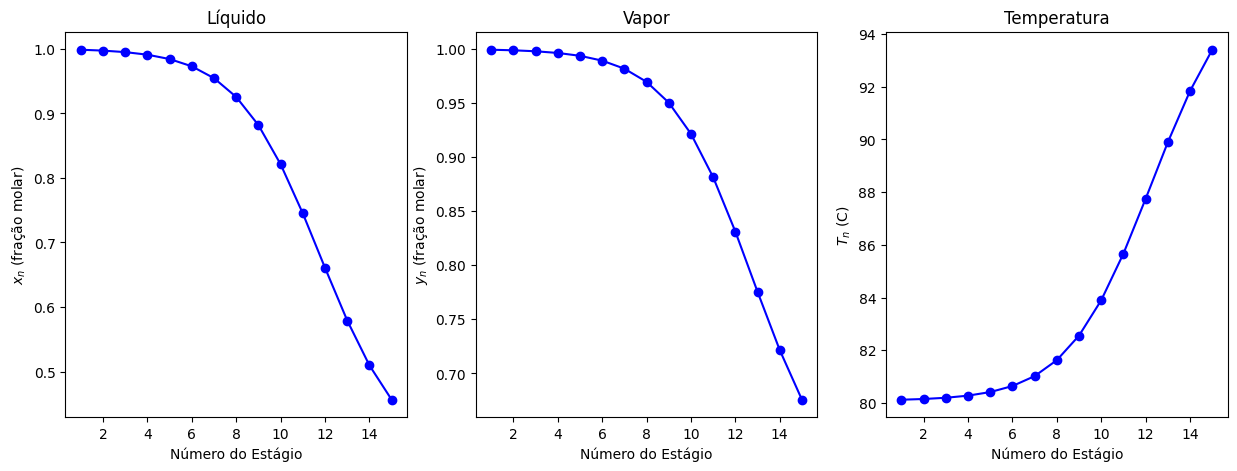

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros especificados no enunciado do problema (linha de operação)
N = 15
Rd = 1.95
xD = 0.9995

# Especificações de Pressão e Composição do destilado
y1 = xD
P = 760  # mmHg

# Antoine Coefficients for Benzene and the atmospheric pressure in mmHg
A1 = 6.90565
B1 = 1211.033
C1 = 220.790

# Initial guesses
x1 = xD
T1 = B1 / (A1 - np.log10(P)) - C1

x = np.array([x1, y1, T1])

# Empty matrix to store the results for each stage
xM = np.zeros((N, 3))

# Varrer um loop por todos os estágios da coluna
print("Coluna de Retificação - Newton-Raphson")
print("===========================================")
print(" k\t xn\t yn\t Tn\t")
print("===========================================")

for k in range(1,N+1):
    # Realizar iteração NR para o estágio k
    x = NewtonRaphson(x)

    print("%2d\t %.4f\t %.4f\t %.4f" % (k, x[0], x[1], x[2]))
    # Adicionar à matriz resultados
    xM[k-1, :] = x

    # Atualizar yn de acordo com a linha de operação da coluna
    x[1] = (Rd * x[0] + xD) / (1 + Rd)
print("==========================================")

# Plotar Gráficos
n = np.arange(1, N+1)
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.plot(n, xM[:, 0],'-ob')
plt.title('Líquido')
plt.xlabel('Número do Estágio')
plt.ylabel('$x_n$ (fração molar)')

plt.subplot(1,3,2)
plt.plot(n, xM[:, 1],'-ob')
plt.title('Vapor')
plt.xlabel('Número do Estágio')
plt.ylabel('$y_n$ (fração molar)')

plt.subplot(1,3,3)
plt.plot(n, xM[:, 2],'-ob')
plt.title('Temperatura')
plt.xlabel('Número do Estágio')
plt.ylabel('$T_n$ (C)')

plt.show()
